**I. INPUT VISUALIZATION**


In [ ]:
from google.colab import files
import csv
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import itertools
import collections
import re
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
nltk.download(['punkt', 'wordnet', 'averaged_perceptron_tagger', 'stopwords','omw-1.4'])

In [ ]:

input = files.upload()

Saving animal-crossing.csv to animal-crossing.csv


In [ ]:
#Lets Take our Critics Data!
df=pd.read_csv('animal-crossing.csv')
print(df)

1. Histogram 

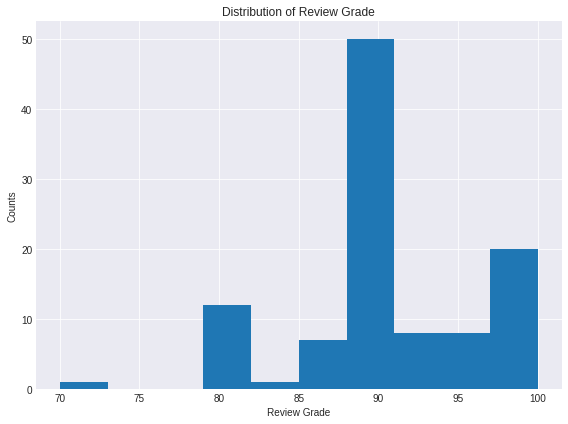

In [ ]:
#@title Histogram Plot
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,6))
plt.hist(df['grade'],bins=10)
# plt.bar(df.grade.value_counts().index, df.grade.value_counts().values)

plt.title("Distribution of Review Grade")
plt.xlabel('Review Grade')
plt.ylabel('Counts')
plt.tight_layout()

2. Pie chart

In [ ]:
#@title Group grades
categories = dict()
for i in range(0, 107):
  if str(df.loc[i][0]) in categories:  
    categories[str(df.loc[i][0])] += 1
  else:
    categories[str(df.loc[i][0])] = 1

print(categories)

group_cat={'96-100':0,'90-95':0,'80-89':0,'70-79':0}

for i in range(70,101):
  if str(i) in categories:
    if 96<=i<=100:
      group_cat['96-100']+=categories[str(i)]
    elif 90<=i<=95:
      group_cat['90-95']+=categories[str(i)]
    elif 80<=i<=89:
      group_cat['80-89']+=categories[str(i)]
    elif 70<=i<=79:
      group_cat['70-79']+=categories[str(i)]

print(group_cat)


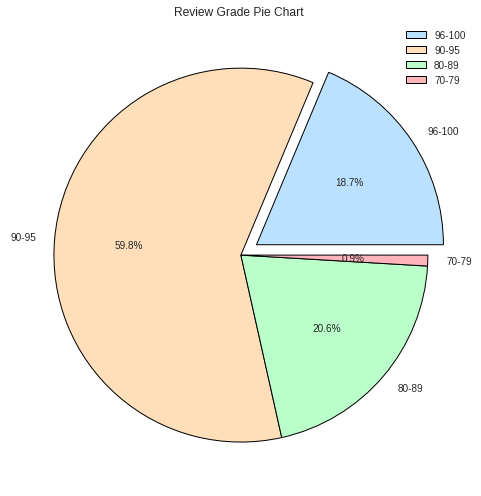

In [ ]:
#@title Pie Plot
slices=group_cat.values()
labels=group_cat.keys()
myexplode = [0.1, 0, 0, 0]
mycolors=['#bae1ff','#ffdfba','#baffc9','#ffb3ba'] #pastel 
fig = plt.figure(figsize =(7, 7))
plt.pie(slices,labels=labels,wedgeprops={'edgecolor':'black'},shadow=False,autopct='%1.1f%%',explode = myexplode,colors=mycolors)

plt.title("Review Grade Pie Chart ")
plt.legend()
plt.tight_layout()

# plt.savefig("C:\BKHCMUT\HK221\piechart.jpg",bbox_inches="tight",pad_inches=2)
# files.download("piechart.jpg") 


**II. OUTPUT VISUALIZATION**


In [ ]:
output = files.upload()

Saving model-output.csv to model-output (1).csv


In [ ]:
#Lets Take our Critics Data!
df1=pd.read_csv('model-output.csv')
print(df1)

1. Sentiment Score (Model Output Score)

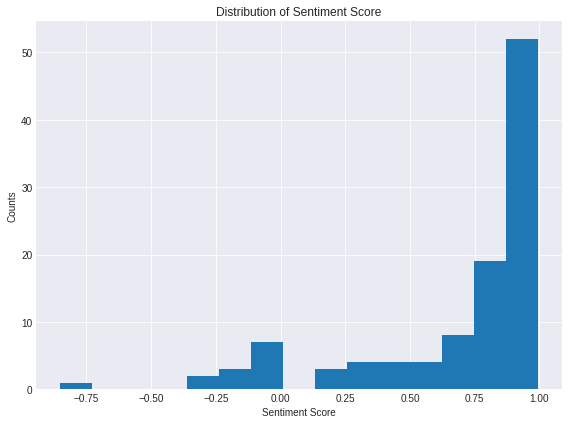

In [ ]:
#@title Histogram Plot
plt.figure(figsize=(8,6))
plt.hist(df1['score'],bins=15)
plt.title("Distribution of Sentiment Score")
plt.xlabel('Sentiment Score')
plt.ylabel('Counts')
plt.tight_layout()

2. Word Cloud (Popular words in review text)





In [ ]:
#@title Declare Wordcloud
texts = df1['text'].tolist()

# # We will want to remove stop words
stop_words = set(stopwords.words('english'))

# update stop words
stop_words.update(['this', 'game', 'the', 'play','Horizons','Crossing','New'])

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords=stop_words
    ).generate(str(texts))


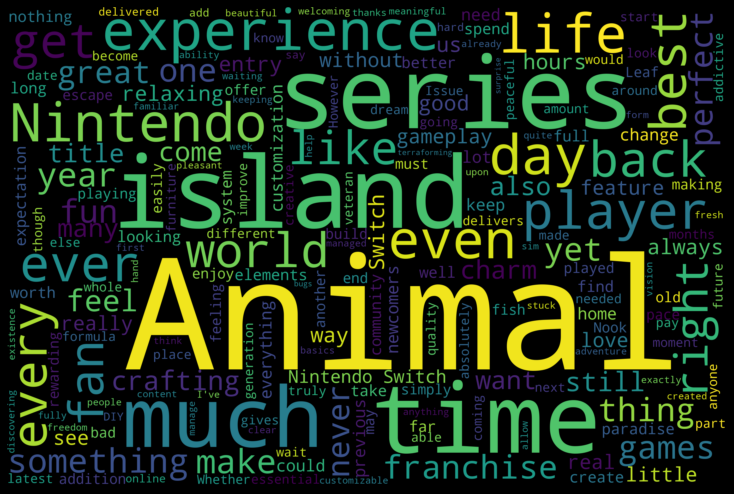

In [ ]:
#@title Wordcloud Plot
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

3. Most popular adjective (2 barh) [-1,0.25) [0.25,1)

In [ ]:
df1['target'] = pd.cut(df1.score,bins=[-1,0.25,1], labels=[0, 1])
df1.target.value_counts()
print(df1.to_string())

In [ ]:
#@title Word Counter
def tokenize(text):
    """Tokenize each review text
    Args: text
    Return: token lists after normalization and lemmatization
    """
    # remove punctuation and change to lowercase
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text).lower()
    # tokenize the word into words
    tokens = word_tokenize(text)

    # remove stopwords
    stop_words  = set(stopwords.words('english'))
    
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatize the word
    lemmatizer = WordNetLemmatizer()
    clean_token = []
    for token in tokens:
        clean_token.append(lemmatizer.lemmatize(token, pos='v').lower().strip())
    return clean_token

In [ ]:
#@title Concatenate commments
# concatenate all comments in low grade group 
dict_low = df1[df1.target == 0].to_dict(orient='list')
low_grade = dict_low['text']

dict_high = df1[df1.target == 1].to_dict(orient='list')
high_grade = dict_high['text']

# print(dict_low)
# print(low_grade)
# print(dict_high)
# print(high_grade)

In [ ]:
#@title Tokenize text
# tokenize text for Counter
low_grade = ' '.join(low_grade)
low_tokens = tokenize(low_grade)

high_grade = ' '.join(high_grade)
high_tokens = tokenize(high_grade)

print(low_grade)
print(low_tokens)

In [ ]:
#@title Select Adjectives
# use pos_tag in NLP to select adjectives
ad_tokens_low = []
for word, tag in pos_tag(low_tokens):
    if tag in ('JJ', 'JJR', 'JJS'):
        ad_tokens_low.append(word)

ad_tokens_high = []
for word, tag in pos_tag(high_tokens):
    if tag in ('JJ', 'JJR', 'JJS'):
        ad_tokens_high.append(word)

print(ad_tokens_low)
print(ad_tokens_high)

In [ ]:
#@title Count
# Count the most popular adjective/adverb 
ad_low_counter = Counter(ad_tokens_low)

ad_high_counter = Counter(ad_tokens_high)

print(ad_low_counter)
print(ad_high_counter)
ad_low_counter.pop('new')
ad_low_counter.pop('animal')
ad_high_counter.pop('new')
ad_high_counter.pop('animal')
print(ad_low_counter)
print(ad_high_counter)

ad_low_top20 = ad_low_counter.most_common(20)
ad_high_top20 = ad_high_counter.most_common(20)

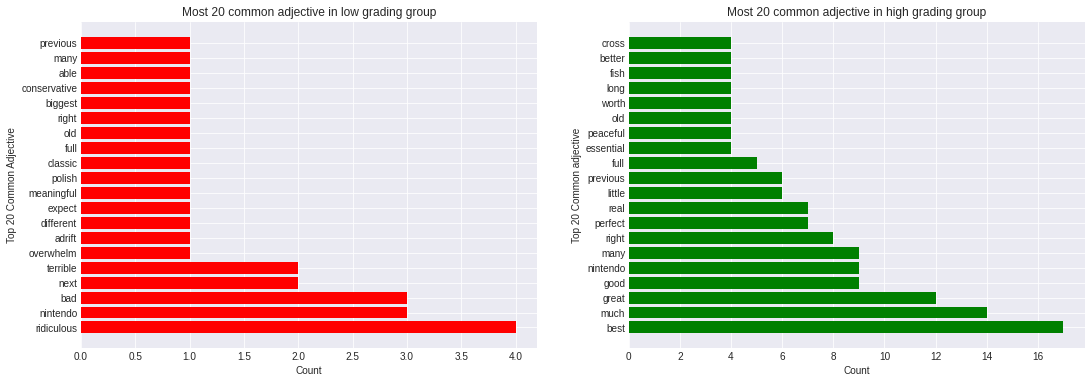

In [ ]:
#@title Bar Plot

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.barh(range(len(ad_low_top20)), [val[1] for val in ad_low_top20], align='center',color='red')
plt.yticks(range(len(ad_low_top20)), [val[0] for val in ad_low_top20])
plt.xlabel('Count')
plt.ylabel('Top 20 Common Adjective')
plt.title('Most 20 common adjective in low grading group')

plt.subplot(1, 2, 2)
plt.barh(range(len(ad_high_top20)), [val[1] for val in ad_high_top20], align='center',color='green')
plt.yticks(range(len(ad_high_top20)), [val[0] for val in ad_high_top20])
plt.xlabel('Count')
plt.ylabel('Top 20 Common adjective')
plt.title('Most 20 common adjective in high grading group');

4. Correlation between Score and Text Length

In [ ]:
#@title Hide
from collections import OrderedDict

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return len(words)


out_categories = dict()
for i in range(0, 107): 
  out_categories[df1.loc[i][1]] = word_count(df1.loc[i][0])

sort_by_length = dict(sorted(out_categories.items(), key=lambda item: item[1]))
sort_by_score = OrderedDict(sorted(out_categories.items()))

print(sort_by_length)
print(sort_by_score)

In [ ]:
#@title Hide
with open('sort_by_length.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(['Score', 'Review length'])
    for key, value in sort_by_length.items():
       writer.writerow([key, value])

with open('sort_by_length.csv') as csv_file:
    reader = csv.reader(csv_file)
    mydict = dict(reader)

csv_sort_by_length = pd.read_csv('sort_by_length.csv')

print(csv_sort_by_length)

with open('sort_by_score.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(['Score', 'Review length'])
    for key, value in sort_by_score.items():
       writer.writerow([key, value])

with open('sort_by_score.csv') as csv_file:
    reader = csv.reader(csv_file)
    mydict = dict(reader)

csv_sort_by_score = pd.read_csv('sort_by_score.csv')

print(csv_sort_by_score)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


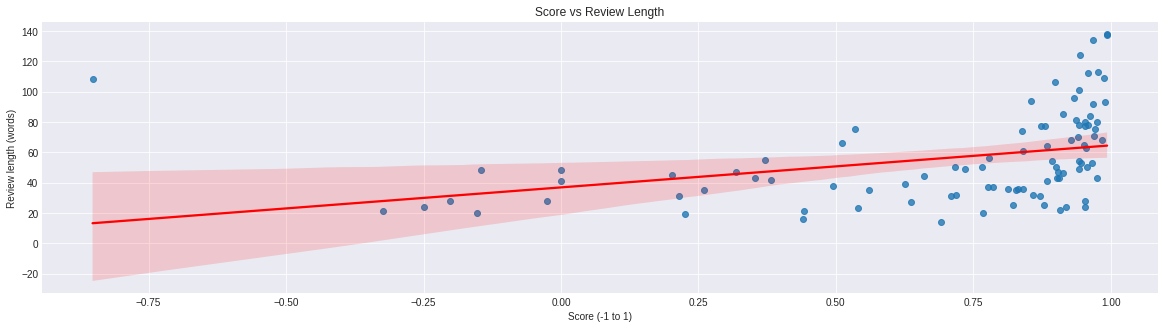

In [ ]:
#@title Linegraph

from collections import OrderedDict

def word_count(str):
    counts = dict()
    words = str.split()

    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1

    return len(words)


out_categories = dict()
for i in range(0, 107): 
  out_categories[df1.loc[i][1]] = word_count(df1.loc[i][0])

sort_by_length = dict(sorted(out_categories.items(), key=lambda item: item[1]))
sort_by_score = OrderedDict(sorted(out_categories.items()))

line_char_x = []
line_char_y = []

for score, length in sort_by_score.items():
  line_char_x += [score]
  line_char_y += [length]

plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize =(20, 5))
# plt.scatter(line_char_x, line_char_y)
# plt.plot(np.unique(line_char_x), np.poly1d(np.polyfit(line_char_x,line_char_y, 1))
#          (np.unique(line_char_x)), color='red')
sns.regplot(line_char_x,line_char_y, line_kws={"color": "red"})
plt.xlabel('Score (-1 to 1)')
plt.ylabel('Review length (words)')
plt.title("Score vs Review Length")
plt.show()